In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy
from utils import load_data

# Model for dataset 1
Logistic regression without regularization

In [36]:
X_train, y_train = load_data("./data/ex2data1.txt")

In [191]:
def compute_cost_logistic(X, y, w, b, lambda_):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = 1/(1+np.exp(-z_i))
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost


In [192]:
def compute_gradient(X,y,w,b, lambda_):
    m,n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = 1 / (1 + np.exp(-(np.dot(X[i],w) + b)))
        err_i = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i

    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db



In [195]:
w_in = np.zeros(X_train.shape[1])
b_in = 0

compute_cost_logistic(X_train,y_train,w_in,b_in,0.1)

np.float64(0.6931471805599458)

In [196]:
X_train.shape[0]

100

In [197]:
def gradient_descent(X,y,w_in,b_in,compute_cost,compute_gradient,alpha,num_iter, lambda_):
    w = copy.deepcopy(w_in)
    b = b_in
    cost_hist = []
    w_hist = []
    for i in range(num_iter):
        dj_dw , dj_db = compute_gradient(X,y,w,b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i <  100000:
            cost = compute_cost(X,y,w,b, lambda_)
            cost_hist.append(cost)

        if i % math.ceil(num_iter / 10) == 0 or i == (num_iter - 1):
            w_hist.append(w)
            print(f"Iteration {i:4}: Cost {float(cost_hist[-1]):8.2f}")
    return w,b, cost_hist, w_hist

In [199]:
np.random.seed(1)
w_in = 0.01 * np.random.randn(X_train.shape[1]) - 0.5
b_in = -8

iterations = 10000
alpha = 0.001

w,b,cost_hist,w_hist = gradient_descent(X_train ,y_train, w_in, b_in, 
                                   compute_cost_logistic, compute_gradient, alpha, iterations, lambda_=0.1)

Iteration    0: Cost    44.97
Iteration 1000: Cost     0.31
Iteration 2000: Cost     0.30
Iteration 3000: Cost     0.30
Iteration 4000: Cost     0.30
Iteration 5000: Cost     0.30
Iteration 6000: Cost     0.30
Iteration 7000: Cost     0.30
Iteration 8000: Cost     0.30
Iteration 9000: Cost     0.30
Iteration 9999: Cost     0.30


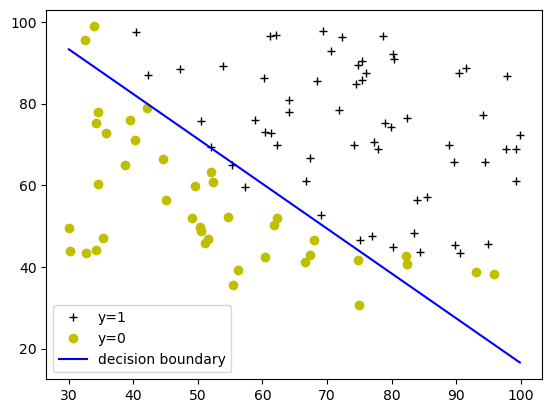

In [200]:
positive = y_train == 1
negative = y_train == 0

plt.plot(X_train[positive,0],X_train[positive,1],"k+",label = "y=1")
plt.plot(X_train[negative,0], X_train[negative,1],"yo",label="y=0")
x_vals = np.array([X_train[:,0].min(), X_train[:,0].max()])

# 3) solve for y using the boundary equation
# decision boundary: w0*x + w1*y + b = 0  -> y = -(b + w0*x)/w1
y_vals = -(b + w[0] * x_vals) / w[1]

# 4) draw the boundary line
plt.plot(x_vals, y_vals, 'b-', label='decision boundary')
plt.legend()

In [201]:
def predict(w,b,X):
    m,n = X.shape
    p = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(X[i],w)+b

        f_wb = 1 / (1+np.exp(-z_wb))

        p[i] = 1 if f_wb >= 0.5 else 0

    return p

    


In [202]:
p  = predict( w, b, X_train)
print(f"Accuracy of the model is: {np.mean(p==y_train)*100}")

Accuracy of the model is: 92.0


# model for the second data set
Regularized logistic regression

In [203]:
X, y = load_data("./data/ex2data2.txt")

In [204]:
X[:10],y[:10]

(array([[ 0.051267,  0.69956 ],
        [-0.092742,  0.68494 ],
        [-0.21371 ,  0.69225 ],
        [-0.375   ,  0.50219 ],
        [-0.51325 ,  0.46564 ],
        [-0.52477 ,  0.2098  ],
        [-0.39804 ,  0.034357],
        [-0.30588 , -0.19225 ],
        [ 0.016705, -0.40424 ],
        [ 0.13191 , -0.51389 ]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

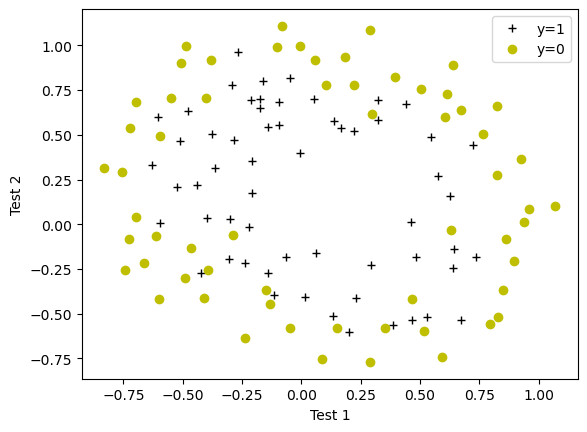

In [205]:
positive = y == 1
negative = y == 0
plt.plot(X[positive,0],X[positive,1],"k+",label = "y=1")
plt.plot(X[negative,0], X[negative,1],"yo",label="y=0")
plt.ylabel("Test 2")
plt.xlabel("Test 1")
plt.legend()

In [206]:
x1 = X[:,0]
x2 = X[:,1]

In [207]:
x1[:5]

array([ 0.051267, -0.092742, -0.21371 , -0.375   , -0.51325 ])

In [208]:
x2[:5]

array([0.69956, 0.68494, 0.69225, 0.50219, 0.46564])

In [209]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))



def map_feature(x1, x2, degree = 6):
    x1 = np.atleast_1d(x1)
    x2 = np.atleast_1d(x2)


    out = []

    for i in range(1, degree + 1):
        for j in range(i+1):
            out.append((x1**(i-j) * (x2**j)))
    return np.stack(out, axis = 1)


In [210]:
X_mapped = map_feature(x1,x2)

In [211]:
X_mapped[0]

array([5.12670000e-02, 6.99560000e-01, 2.62830529e-03, 3.58643425e-02,
       4.89384194e-01, 1.34745327e-04, 1.83865725e-03, 2.50892595e-02,
       3.42353606e-01, 6.90798869e-06, 9.42624411e-05, 1.28625106e-03,
       1.75514423e-02, 2.39496889e-01, 3.54151856e-07, 4.83255257e-06,
       6.59422333e-05, 8.99809795e-04, 1.22782870e-02, 1.67542444e-01,
       1.81563032e-08, 2.47750473e-07, 3.38066048e-06, 4.61305487e-05,
       6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

## Cost function for regularized logistic regression

In [215]:
def compute_reg_cost(X,y,w,b,lambda_):
    m,n = X.shape
    cost = compute_cost_logistic(X,y,w,b,lambda_)

    reg_fun = np.sum(np.square(w))

    total_cost = cost + (lambda_/(2*m)) * reg_fun

    return total_cost

In [216]:
np.random.seed(1)

w_in = 0.1 * np.random.rand(X_mapped.shape[1]) - 0.5
b_in = 0.5

compute_reg_cost(X_mapped, y, w_in, b_in, 0.5)

np.float64(0.6574055834319766)

## Gradient descent for regularized logistic regression

In [217]:
def reg_gradient(X,y,w,b,lambda_):
    m,n = X.shape

    dj_dw, dj_db = compute_gradient(X,y,w,b,lambda_)

    dj_dw += (lambda_/m) * np.sum(w)
    dj_db += (lambda_/m) * np.sum(w)

    return dj_dw, dj_db


In [218]:
w,b,_,_ = gradient_descent(X_mapped, y, w_in, 1 ,compute_reg_cost, reg_gradient, 0.01, 10000, 0.01)

Iteration    0: Cost     0.65
Iteration 1000: Cost     0.57
Iteration 2000: Cost     0.54
Iteration 3000: Cost     0.51
Iteration 4000: Cost     0.50
Iteration 5000: Cost     0.48
Iteration 6000: Cost     0.47
Iteration 7000: Cost     0.46
Iteration 8000: Cost     0.45
Iteration 9000: Cost     0.45
Iteration 9999: Cost     0.44


In [219]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    
    
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

/var/folders/4x/hpms44gd5mlclfj15vlfz0tr0000gn/T/ipykernel_58693/2327615440.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


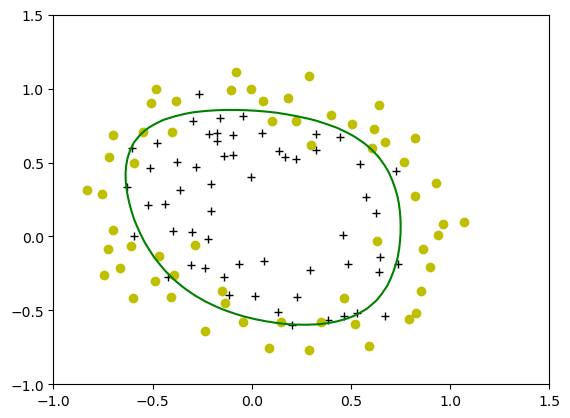

In [220]:
plot_decision_boundary(w,b,X_mapped,y)

In [223]:
p = predict(w,b, X_mapped)
print(f"prediction with regularization: {p}")

prediction with regularization: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]


In [225]:
print(f"Accuracy of the model is: {np.mean(p == y) * 100}")

Accuracy of the model is: 81.35593220338984
